In [1]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

In [2]:
classifier = Sequential()

classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))

In [3]:
classifier.add(MaxPooling2D(pool_size = (2, 2)))

classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

classifier.add(Flatten())

classifier.add(Dense(activation = 'relu',units=128))
classifier.add(Dense(activation = 'sigmoid',units=1))

classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 128)               8

In [4]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)


In [5]:
import os 
os.getcwd()
os.chdir(r'C:\Users\niranjan reddy\Desktop\project\DEEP LEARNING APPLICATIONS IN MEDICAL IMAGE ANALYSIS-BRAIN TUMOR\TestImages')
print(os.getcwd())

C:\Users\niranjan reddy\Desktop\project\DEEP LEARNING APPLICATIONS IN MEDICAL IMAGE ANALYSIS-BRAIN TUMOR\TestImages


In [6]:
training_set = train_datagen.flow_from_directory(r'C:\Users\niranjan reddy\Desktop\project\DEEP LEARNING APPLICATIONS IN MEDICAL IMAGE ANALYSIS-BRAIN TUMOR\Brain_tumor\train',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

test_set = test_datagen.flow_from_directory(r'C:\Users\niranjan reddy\Desktop\project\DEEP LEARNING APPLICATIONS IN MEDICAL IMAGE ANALYSIS-BRAIN TUMOR\Brain_tumor\test',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')


Found 23 images belonging to 2 classes.
Found 7 images belonging to 2 classes.


In [7]:
classifier.fit_generator(training_set, steps_per_epoch=None, epochs=100, verbose=1, callbacks=None, validation_data=test_set, validation_steps=None, class_weight=None, max_queue_size=10, workers=1, use_multiprocessing=False, shuffle=True, initial_epoch=0)
     

<ipython-input-7-763760926340>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  classifier.fit_generator(training_set, steps_per_epoch=None, epochs=100, verbose=1, callbacks=None, validation_data=test_set, validation_steps=None, class_weight=None, max_queue_size=10, workers=1, use_multiprocessing=False, shuffle=True, initial_epoch=0)


Epoch 1/100
1/1 [==============================] - 1s 1000ms/step - loss: 0.6933 - accuracy: 0.5217 - val_loss: 0.7325 - val_accuracy: 0.5714
Epoch 2/100
1/1 [==============================] - 0s 183ms/step - loss: 0.8002 - accuracy: 0.5652 - val_loss: 0.6638 - val_accuracy: 0.5714
Epoch 3/100
1/1 [==============================] - 0s 187ms/step - loss: 0.6788 - accuracy: 0.5652 - val_loss: 0.7119 - val_accuracy: 0.4286
Epoch 4/100
1/1 [==============================] - 0s 173ms/step - loss: 0.6800 - accuracy: 0.5217 - val_loss: 0.7177 - val_accuracy: 0.4286
Epoch 5/100
1/1 [==============================] - 0s 187ms/step - loss: 0.6838 - accuracy: 0.4348 - val_loss: 0.7050 - val_accuracy: 0.5714
Epoch 6/100
1/1 [==============================] - 0s 161ms/step - loss: 0.6743 - accuracy: 0.5652 - val_loss: 0.6947 - val_accuracy: 0.4286
Epoch 7/100
1/1 [==============================] - 0s 148ms/step - loss: 0.6589 - accuracy: 0.6522 - val_loss: 0.6852 - val_accuracy: 0.4286
Epoch 8/100


Epoch 59/100
1/1 [==============================] - 0s 181ms/step - loss: 0.1945 - accuracy: 0.9130 - val_loss: 1.4221 - val_accuracy: 0.5714
Epoch 60/100
1/1 [==============================] - 0s 194ms/step - loss: 0.2103 - accuracy: 0.8696 - val_loss: 1.4205 - val_accuracy: 0.4286
Epoch 61/100
1/1 [==============================] - 0s 176ms/step - loss: 0.2856 - accuracy: 0.9130 - val_loss: 1.4034 - val_accuracy: 0.4286
Epoch 62/100
1/1 [==============================] - 0s 226ms/step - loss: 0.2088 - accuracy: 0.9130 - val_loss: 1.4021 - val_accuracy: 0.5714
Epoch 63/100
1/1 [==============================] - 0s 171ms/step - loss: 0.1436 - accuracy: 0.9565 - val_loss: 1.5486 - val_accuracy: 0.5714
Epoch 64/100
1/1 [==============================] - 0s 195ms/step - loss: 0.1420 - accuracy: 0.9565 - val_loss: 1.7881 - val_accuracy: 0.5714
Epoch 65/100
1/1 [==============================] - 0s 179ms/step - loss: 0.1704 - accuracy: 0.9130 - val_loss: 1.9943 - val_accuracy: 0.4286
Epoch 

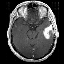

In [8]:
import numpy as np
from keras.preprocessing import image
import keras
test_image = keras.utils.load_img(r'C:\Users\niranjan reddy\Desktop\project\DEEP LEARNING APPLICATIONS IN MEDICAL IMAGE ANALYSIS-BRAIN TUMOR\TestImages\MR-UiO_None.jpg', target_size = (64, 64))
test_image

In [9]:
test_image =  keras.utils.img_to_array(test_image)

test_image = np.expand_dims(test_image, axis = 0)
test_image

array([[[[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        ...,

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]]]], dtype=float32)

In [10]:
result = classifier.predict(test_image)
result

1/1 [==============================] - 0s 91ms/step


array([[0.]], dtype=float32)

In [11]:
training_set.class_indices

{'Benign': 0, 'Malignant': 1}

In [12]:
if result[0][0] == 0:
    prediction = 'Benign'
else:
    prediction = 'Malignent'
print("Detected tumor type is %s"%prediction)


Detected tumor type is Benign
